In [25]:
import numpy as np
nan = np.nan
galaxy_names = ['M 31', 'M 33', 'M 51', 'M 74', 'M 81', 
'M 83', 'M 101', 'NGC 253', 'NGC 1097', 'NGC 1365', 
'NGC 1566', 'NGC 3627', 'NGC 4254', 'NGC 4414', 
'NGC 4449', 'NGC 4736', 'NGC 6946', 'IC 342', 'LMC']

# ps_l: Lower limit of pitch angles
ps_l = np.array([
    7,  # M 31
    29,  # M 33
    15,  # M 51
    13,  # M 74
    14,  # M 81
    14,  # M 83
    10,  # M 101
    nan,  # NGC 253
    27,  # NGC 1097
    nan,  # NGC 1365
    19,  # NGC 1566
    10,  # NGC 3627
    6,  # NGC 4254
    20,  # NGC 4414
    nan,  # NGC 4449
    nan,  # NGC 4736
    20,  # NGC 6946
    10,  # IC 342
    nan,  # LMC
])

# ps_m: Upper limit of pitch angles
ps_m = np.array([
    8,  # M 31
    50,  # M 33
    25,  # M 51
    41,  # M 74
    24,  # M 81
    17,  # M 83
    30,  # M 101
    nan,  # NGC 253
    35,  # NGC 1097
    nan,  # NGC 1365
    21,  # NGC 1566
    50,  # NGC 3627
    72,  # NGC 4254
    40,  # NGC 4414
    nan,  # NGC 4449
    nan,  # NGC 4736
    28,  # NGC 6946
    25,  # IC 342
    nan,  # LMC
])

# po: Last values of p_o
po = np.array([
    27,  # M 31
    35,  # M 33
    19,  # M 51
    24,  # M 74
    26,  # M 81
    20,  # M 83
    28,  # M 101
    25,  # NGC 253
    nan,  # NGC 1097
    nan,  # NGC 1365
    15,  # NGC 1566
    68,  # NGC 3627
    24,  # NGC 4254
    26,  # NGC 4414
    28,  # NGC 4449
    35,  # NGC 4736
    10,  # NGC 6946
    10,  # IC 342
    nan,  # LMC
])

pB = np.array([
    5,  # M 31
    41,  # M 33
    18,  # M 51
    nan,  # M 74 (no data)
    20,  # M 81
    nan,  # M 83 (no data)
    nan,  # M 101 (no data)
    26,  # NGC 253
    23,  # NGC 1097
    33,  # NGC 1365
    nan,  # NGC 1566 (no data)
    nan,  # NGC 3627 (no data)
    29,  # NGC 4254
    22,  # NGC 4414 (no data)
    38,  # NGC 4449
    nan,  # NGC 4736 (no data)
    nan,  # NGC 6946 (no data)
    6,  # IC 342
    4,  # LMC
])

In [26]:
ps= (ps_l+ps_m)/2
ps

array([ 7.5, 39.5, 20. , 27. , 19. , 15.5, 20. ,  nan, 31. ,  nan, 20. ,
       30. , 39. , 30. ,  nan,  nan, 24. , 17.5,  nan])

C:\Users\Admin\AppData\Local\Temp\ipykernel_40944\1382271759.py:19: RuntimeWarning: Mean of empty slice
  ps = np.nanmean([ps_l, ps_m], axis=0)


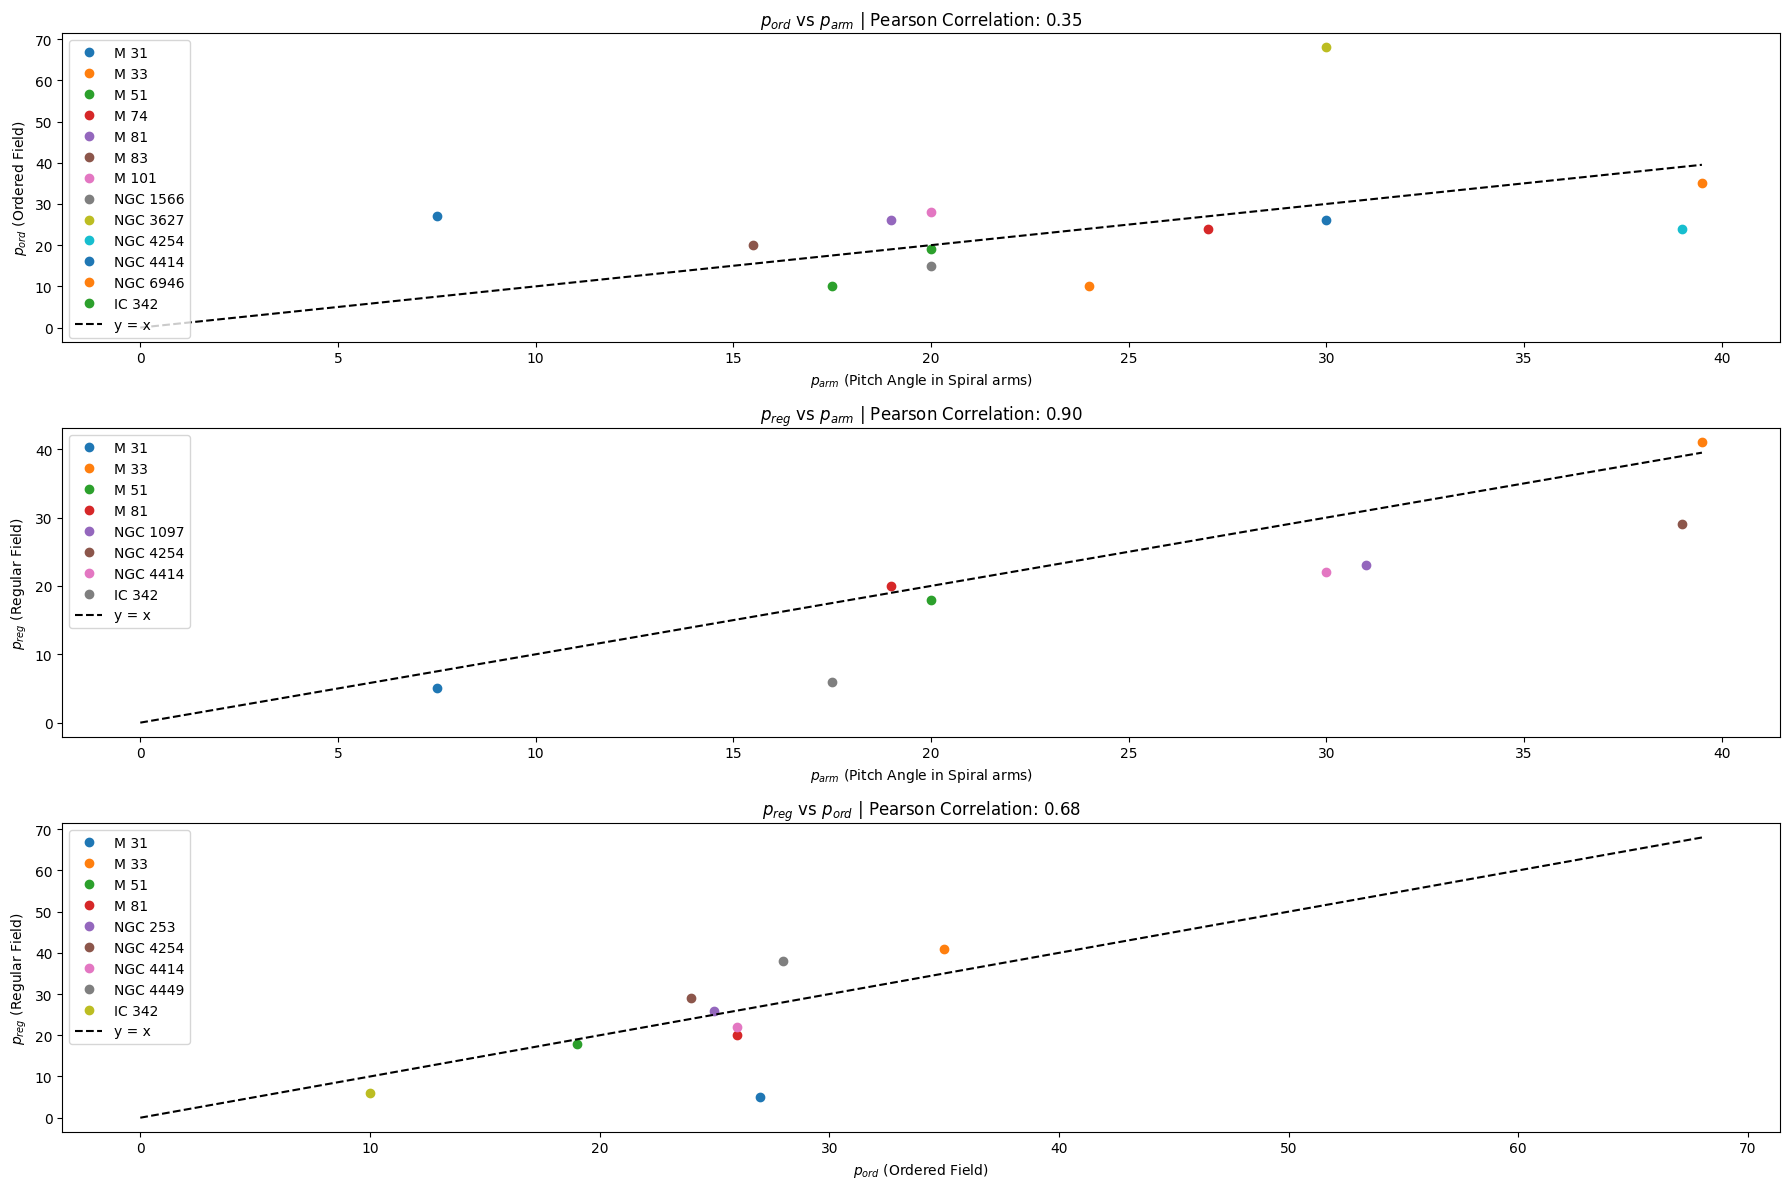

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Galaxy names
galaxy_names = [
    'M 31', 'M 33', 'M 51', 'M 74', 'M 81',
    'M 83', 'M 101', 'NGC 253', 'NGC 1097', 'NGC 1365',
    'NGC 1566', 'NGC 3627', 'NGC 4254', 'NGC 4414',
    'NGC 4449', 'NGC 4736', 'NGC 6946', 'IC 342', 'LMC'
]

# Given arrays
ps_l = np.array([7, 29, 15, 13, 14, 14, 10, np.nan, 27, np.nan, 19, 10, 6, 20, np.nan, np.nan, 20, 10, np.nan])
ps_m = np.array([8, 50, 25, 41, 24, 17, 30, np.nan, 35, np.nan, 21, 50, 72, 40, np.nan, np.nan, 28, 25, np.nan])
po = np.array([27, 35, 19, 24, 26, 20, 28, 25, np.nan, np.nan, 15, 68, 24, 26, 28, 35, 10, 10, np.nan])
pB = np.array([5, 41, 18, np.nan, 20, np.nan, np.nan, 26, 23, 33, np.nan, np.nan, 29, 22, 38, np.nan, np.nan, 6, 4])

# Calculate average of ps_l and ps_m to get ps
ps = np.nanmean([ps_l, ps_m], axis=0)

# Pearson correlation coefficients
corr_ps_po = np.corrcoef(ps[~np.isnan(ps) & ~np.isnan(po)], po[~np.isnan(ps) & ~np.isnan(po)])[0, 1]
corr_ps_pB = np.corrcoef(ps[~np.isnan(ps) & ~np.isnan(pB)], pB[~np.isnan(ps) & ~np.isnan(pB)])[0, 1]
corr_po_pB = np.corrcoef(po[~np.isnan(po) & ~np.isnan(pB)], pB[~np.isnan(po) & ~np.isnan(pB)])[0, 1]

# Plotting without shaded areas and adding y = x line
f = plt.figure(figsize=(18, 12))

# Plot 1: p_arm vs p_ord
plt.subplot(3, 1, 1)
for i, galaxy in enumerate(galaxy_names):
    if not np.isnan(ps[i]) and not np.isnan(po[i]):
        plt.plot(ps[i], po[i], 'o', label=galaxy)
plt.plot([0, max(ps)], [0, max(ps)], 'k--', label='y = x')  # y = x line
plt.xlabel(r'$p_{arm}$ (Pitch Angle in Spiral arms)')
plt.ylabel(r'$p_{ord}$ (Ordered Field)')
plt.title(f'$p_{{ord}}$ vs $p_{{arm}}$ | Pearson Correlation: {corr_ps_po:.2f}')
plt.legend()

# Plot 2: p_arm vs p_reg
plt.subplot(3, 1, 2)
for i, galaxy in enumerate(galaxy_names):
    if not np.isnan(ps[i]) and not np.isnan(pB[i]):
        plt.plot(ps[i], pB[i], 'o', label=galaxy)
plt.plot([0, max(ps)], [0, max(ps)], 'k--', label='y = x')  # y = x line
plt.xlabel(r'$p_{arm}$ (Pitch Angle in Spiral arms)')
plt.ylabel(r'$p_{reg}$ (Regular Field)')
plt.title(f'$p_{{reg}}$ vs $p_{{arm}}$ | Pearson Correlation: {corr_ps_pB:.2f}')
plt.legend()

# Plot 3: p_ord vs p_reg
plt.subplot(3, 1, 3)
for i, galaxy in enumerate(galaxy_names):
    if not np.isnan(po[i]) and not np.isnan(pB[i]):
        plt.plot(po[i], pB[i], 'o', label=galaxy)
plt.plot([0, max(po)], [0, max(po)], 'k--', label='y = x')  # y = x line
plt.xlabel(r'$p_{ord}$ (Ordered Field)')
plt.ylabel(r'$p_{reg}$ (Regular Field)')
plt.title(f'$p_{{reg}}$ vs $p_{{ord}}$ | Pearson Correlation: {corr_po_pB:.2f}')
plt.legend()

plt.tight_layout()
plt.show()
f.savefig('galaxy_pitchangle_correlation.pdf')



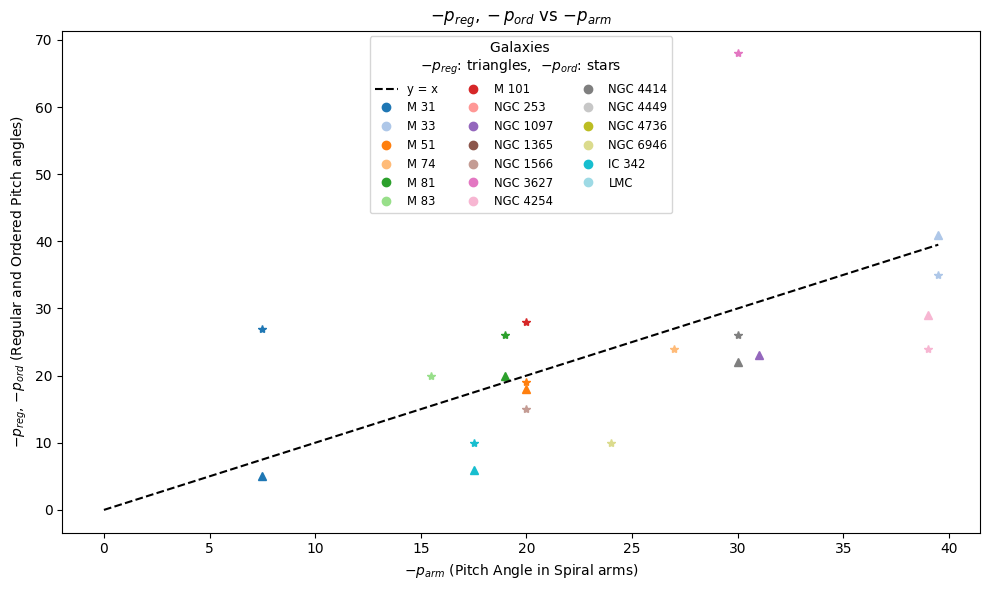

In [28]:
# Create a single plot with one legend based on galaxy colors
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define a color map for galaxies
colors = plt.cm.tab20(np.linspace(0, 1, len(galaxy_names)))

# Plot pB vs ps (left y-axis) and po vs ps (right y-axis)
for i, (galaxy, color) in enumerate(zip(galaxy_names, colors)):
    if not np.isnan(ps[i]) and not np.isnan(pB[i]):
        ax1.plot(ps[i], pB[i], '^', color=color, alpha=1)
    if not np.isnan(ps[i]) and not np.isnan(po[i]):
        ax1.plot(ps[i], po[i], '*', color=color, alpha=1)

# y = x line for reference
ax1.plot([0, max(ps)], [0, max(ps)], 'k--', label='y = x')

# Axis labels and titles
ax1.set_xlabel(r'$-p_{arm}$ (Pitch Angle in Spiral arms)')
ax1.set_ylabel(r'$-p_{reg}$, $-p_{ord}$ (Regular and Ordered Pitch angles)')
ax1.set_title(r'$-p_{reg}, -p_{ord}$ vs $-p_{arm}$')

# Legend with galaxy colors
for i, galaxy in enumerate(galaxy_names):
    ax1.plot([], [], 'o', color=colors[i], label=galaxy)
ax1.legend(loc='upper center', ncol=3, fontsize='small', title='                Galaxies\n$-p_{reg}$: triangles,  $-p_{ord}$: stars')

plt.tight_layout()
plt.show()

fig.savefig('galaxy_pitchangle_correlation.jpg')


In [32]:
import numpy as np
nan = np.nan
galaxy_names = ['M 31', 'M 33', 'M 51', 'M 74', 'M 81', 
'M 83', 'M 101', 'NGC 253', 'NGC 1097', 'NGC 1365', 
'NGC 1566', 'NGC 3627', 'NGC 4254', 'NGC 4414', 
'NGC 4449', 'NGC 4736', 'NGC 6946', 'IC 342', 'LMC']

# ps_l: Lower limit of pitch angles
ps_l = [
    7,  # M 31
    29,  # M 33
    15,  # M 51
    13,  # M 74
    14,  # M 81
    14,  # M 83
    10,  # M 101
    nan,  # NGC 253
    27,  # NGC 1097
    nan,  # NGC 1365
    19,  # NGC 1566
    10,  # NGC 3627
    6,  # NGC 4254
    20,  # NGC 4414
    nan,  # NGC 4449
    nan,  # NGC 4736
    20,  # NGC 6946
    10,  # IC 342
    nan  # LMC
]

# ps_m: Upper limit of pitch angles
ps_u = [
    8,  # M 31
    50,  # M 33
    25,  # M 51
    41,  # M 74
    24,  # M 81
    17,  # M 83
    30,  # M 101
    nan,  # NGC 253
    35,  # NGC 1097
    nan,  # NGC 1365
    21,  # NGC 1566
    50,  # NGC 3627
    72,  # NGC 4254
    40,  # NGC 4414
    nan,  # NGC 4449
    nan,  # NGC 4736
    28,  # NGC 6946
    25,  # IC 342
    nan  # LMC
]

# po: Last values of p_o
po = [
    [30,29,26,27,27],  # M 31
    [48,40,41,35],  # M 33
    [20,27,19],  # M 51
    [61,45,19,24],  # M 74
    [21,26],  # M 81
    [35,23,32,20],  # M 83
    [39,30,28],  # M 101
    [25],  # NGC 253
    [nan],  # NGC 1097
    [nan],  # NGC 1365
    [29,17,15],  # NGC 1566
    [16,27,68],  # NGC 3627
    [28,27,30,26,22,24],  # NGC 4254
    [30,27,27,26],  # NGC 4414
    [28],  # NGC 4449
    [35],  # NGC 4736
    [27,21,10,30,32,10],  # NGC 6946
    [22,16,20,16,19,10,19,25,18,10],  # IC 342
    [nan]  # LMC
]

pB = [
    [13, 19, 11, 8, 4, 9, 7, 7, 5],  # M 31
    [51,41],  # M 33
    [20,24,22,18],  # M 51
    [nan],  # M 74 (no data)
    [6,20,14,14],  # M 81
    [nan],  # M 83 (no data)
    [nan],  # M 101 (no data)
    [26],  # NGC 253
    [34,36,23],  # NGC 1097
    [34,17,31,22,37,29,33],  # NGC 1365
    [nan],  # NGC 1566 (no data)
    [nan],  # NGC 3627 (no data)
    [27,24,29],  # NGC 4254
    [22],  # NGC 4414 (no data)
    [59,38],  # NGC 4449
    [nan],  # NGC 4736 (no data)
    [nan],  # NGC 6946 (no data)
    [0,6,34,7,20,16,30,4],  # IC 342
    [4]  # LMC
]

In [33]:
ps = np.array([np.mean(np.array(p)) for p in ps])
po_mean = [np.mean(np.array(p)) for p in po]
pB_mean = [np.mean(np.array(p)) for p in pB]

po_u = [np.max(np.array(p)) for p in po]
po_l = [np.min(np.array(p)) for p in po]

pB_u = [np.max(np.array(p)) for p in pB]
pB_l = [np.min(np.array(p)) for p in pB]



TypeError: unsupported operand type(s) for -: 'list' and 'list'

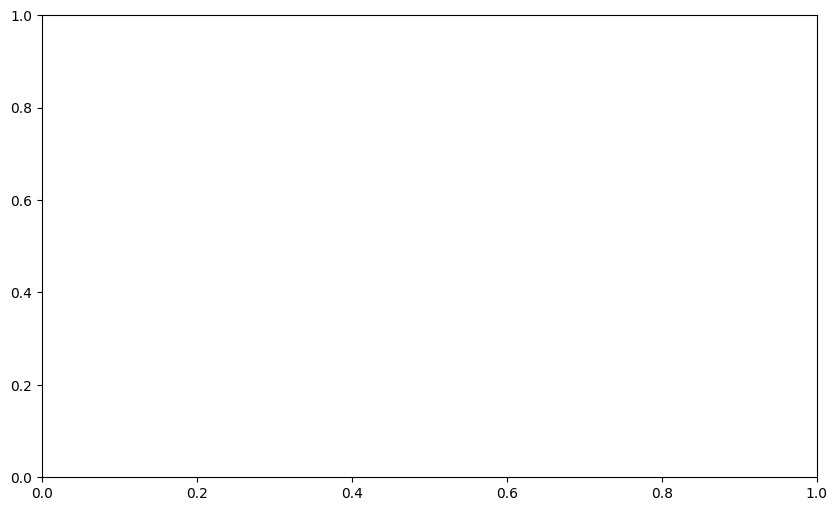

In [34]:
# Create a single plot with error bars for both x and y axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define a color map for galaxies
colors = plt.cm.tab20(np.linspace(0, 1, len(galaxy_names)))

# Define errors (assuming ps_l and ps_m give the range for ps, and po/pB have some estimated errors)
ps_errors = [(ps - ps_l, ps_m - ps)]  # X-axis errors from lower and upper limits
po_errors = [np.full_like(po, 5)]  # Placeholder error values for po (adjust if needed)
pB_errors = [np.full_like(pB, 5)]  # Placeholder error values for pB (adjust if needed)

# Convert errors into a format usable for errorbars
ps_errors = np.array(ps_errors).squeeze()
po_errors = np.array(po_errors).squeeze()
pB_errors = np.array(pB_errors).squeeze()

# Plot pB vs ps with error bars (triangles)
for i, (galaxy, color) in enumerate(zip(galaxy_names, colors)):
    if not np.isnan(ps[i]) and not np.isnan(pB[i]):
        ax1.errorbar(ps[i], pB[i], xerr=[[ps_errors[0][i]], [ps_errors[1][i]]],
                     yerr=pB_errors[i], fmt='^', color=color, alpha=1, capsize=3)

# Plot po vs ps with error bars (stars)
for i, (galaxy, color) in enumerate(zip(galaxy_names, colors)):
    if not np.isnan(ps[i]) and not np.isnan(po[i]):
        ax1.errorbar(ps[i], po[i], xerr=[[ps_errors[0][i]], [ps_errors[1][i]]],
                     yerr=po_errors[i], fmt='*', color=color, alpha=1, capsize=3)

# y = x line for reference
ax1.plot([0, max(ps)], [0, max(ps)], 'k--', label='y = x')

# Axis labels and titles
ax1.set_xlabel(r'$-p_{arm}$ (Pitch Angle in Spiral arms)')
ax1.set_ylabel(r'$-p_{reg}$, $-p_{ord}$ (Regular and Ordered Pitch angles)')
ax1.set_title(r'$-p_{reg}, -p_{ord}$ vs $-p_{arm}$')

# Legend with galaxy colors
for i, galaxy in enumerate(galaxy_names):
    ax1.plot([], [], 'o', color=colors[i], label=galaxy)
ax1.legend(loc='upper center', ncol=3, fontsize='small',
           title='                Galaxies\n$-p_{reg}$: triangles,  $-p_{ord}$: stars')

plt.tight_layout()
plt.show()
